## Aim :- 

In our role as security or defense analysts, we've been assigned the responsibility of examining the data and deriving insights regarding the prevalence and characteristics of documented terrorist incidents worldwide. This analysis aims to address the following inquiries:

How has the frequency of terrorist activities evolved over time? Are there specific regions exhibiting trends that deviate from the global norms?

Is there a correlation between the number of incidents and the number of casualties? Are there any noteworthy anomalies or exceptional cases within this relationship?

What are the prevailing tactics employed in these attacks? Do these methods vary across different regions or time periods?

## About Dataset : -

The Global Terrorism Database (GTD) is an open-source repository that contains comprehensive data on over 180,000 terrorist attacks worldwide spanning from 1970 to 2017. This database encompasses both domestic and international terrorist incidents and is managed by researchers associated with the National Consortium for the Study of Terrorism and Responses to Terrorism (START), which is based at the University of Maryland.

### Import Libraries

In [13]:
import math           #This module provides access to the mathematical functions
import numpy as np 
import pandas as pd 
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Load and Explore the dataset

In [19]:
##Load the data set
terr = pd.read_excel(r'D:\DatSets\Terrorism_Data_Analysis\terrorism.xlsx')

In [22]:
terr.shape

(181691, 135)

In [20]:
# Display the first 5 rows of the dataset
terr.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [21]:
# Display the last 5 rows of the dataset
terr.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaT,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaT,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaT,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaT,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaT,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [27]:
terr.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [30]:
#Renaming the columns
terr.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                     'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                     'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)


In [32]:
#As there are too many columns in dataset, we are taking only important columns from the dataset for data preprocessing
terrorism = terr[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [34]:
terrorism.head(2)

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN


In [35]:
#Cheching the null values
terrorism.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [36]:
terrorism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

In [37]:
terrorism.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [39]:
terrorism['Year'].value_counts(dropna=False).sort_index() #DropNA doesnot calculate the Missing VALUES

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: Year, dtype: int64

# Data Visualization

### People Killed and Wounded In Each Year

In [41]:
terrorism.head(2)

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN


In [46]:
b =terrorism[["Year","Wounded"]].groupby("Year").sum()
b.head()

,Wounded
Year,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0


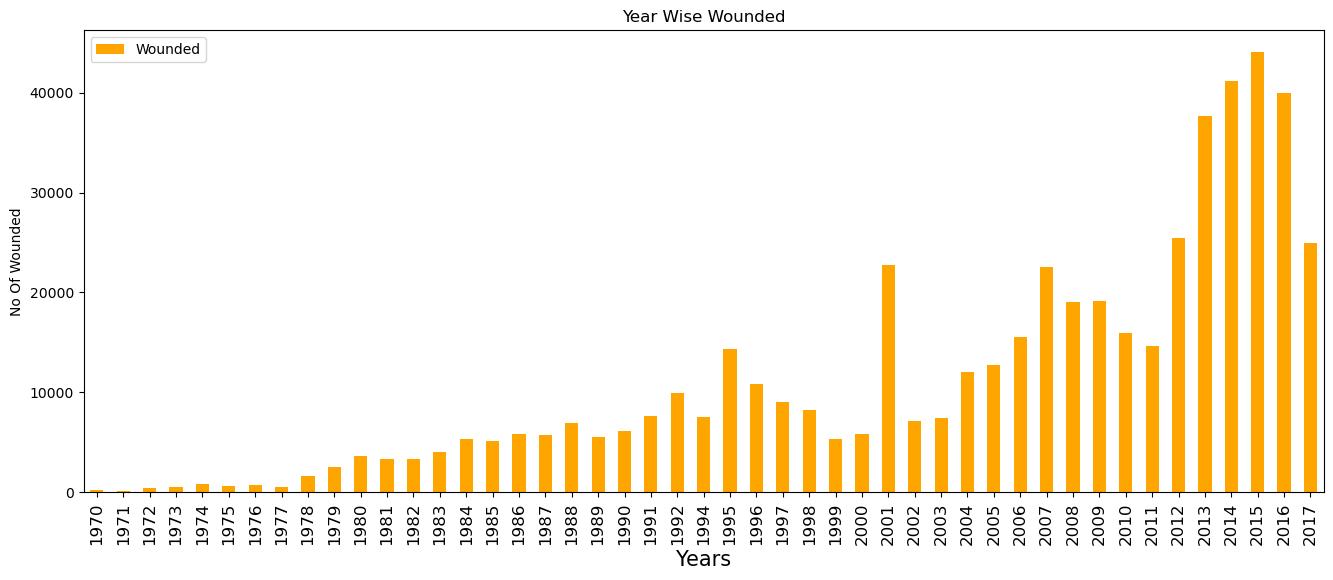

In [49]:
b.plot(kind='bar', color='orange',figsize=(16,6))
plt.title('Year Wise Wounded')
plt.xlabel('Years',fontsize=15)
plt.ylabel('No Of Wounded')
plt.xticks(fontsize=12)
plt.show()


In [50]:
c =terrorism[["Year","Killed"]].groupby("Year").sum()
c.head()

,Killed
Year,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0


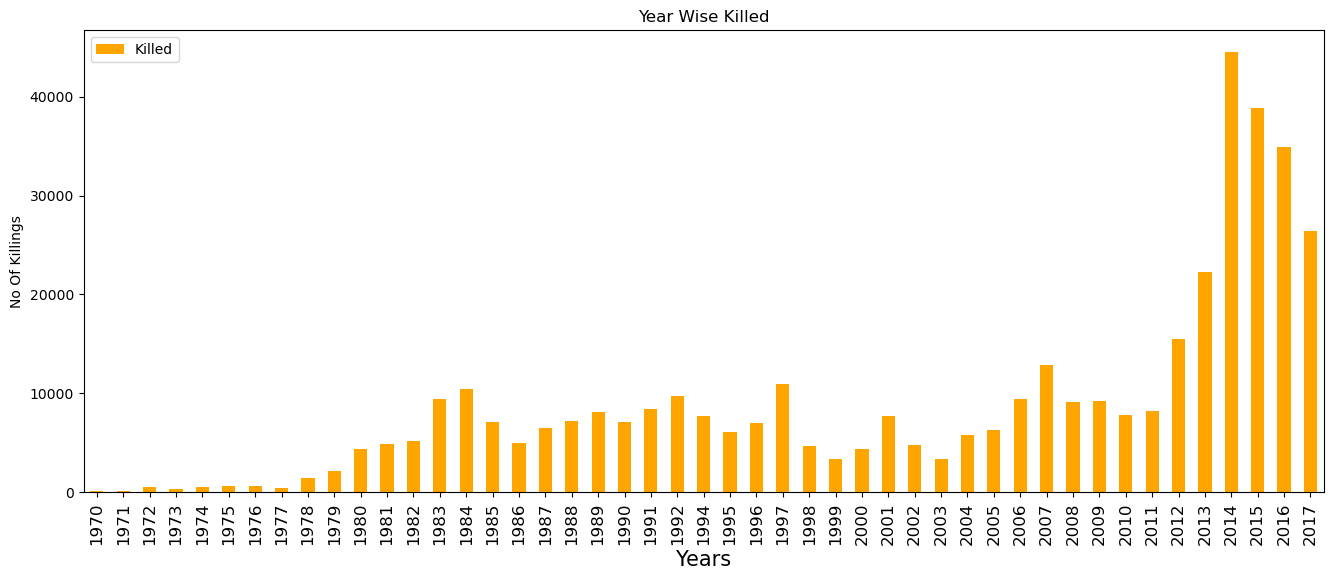

In [51]:
c.plot(kind='bar', color='orange',figsize=(16,6))
plt.title('Year Wise Killed')
plt.xlabel('Years',fontsize=15)
plt.ylabel('No Of Killings')
plt.xticks(fontsize=12)
plt.show()

### Number of Terrorist Activities each Year

In [53]:
terrorism.head(2)

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN


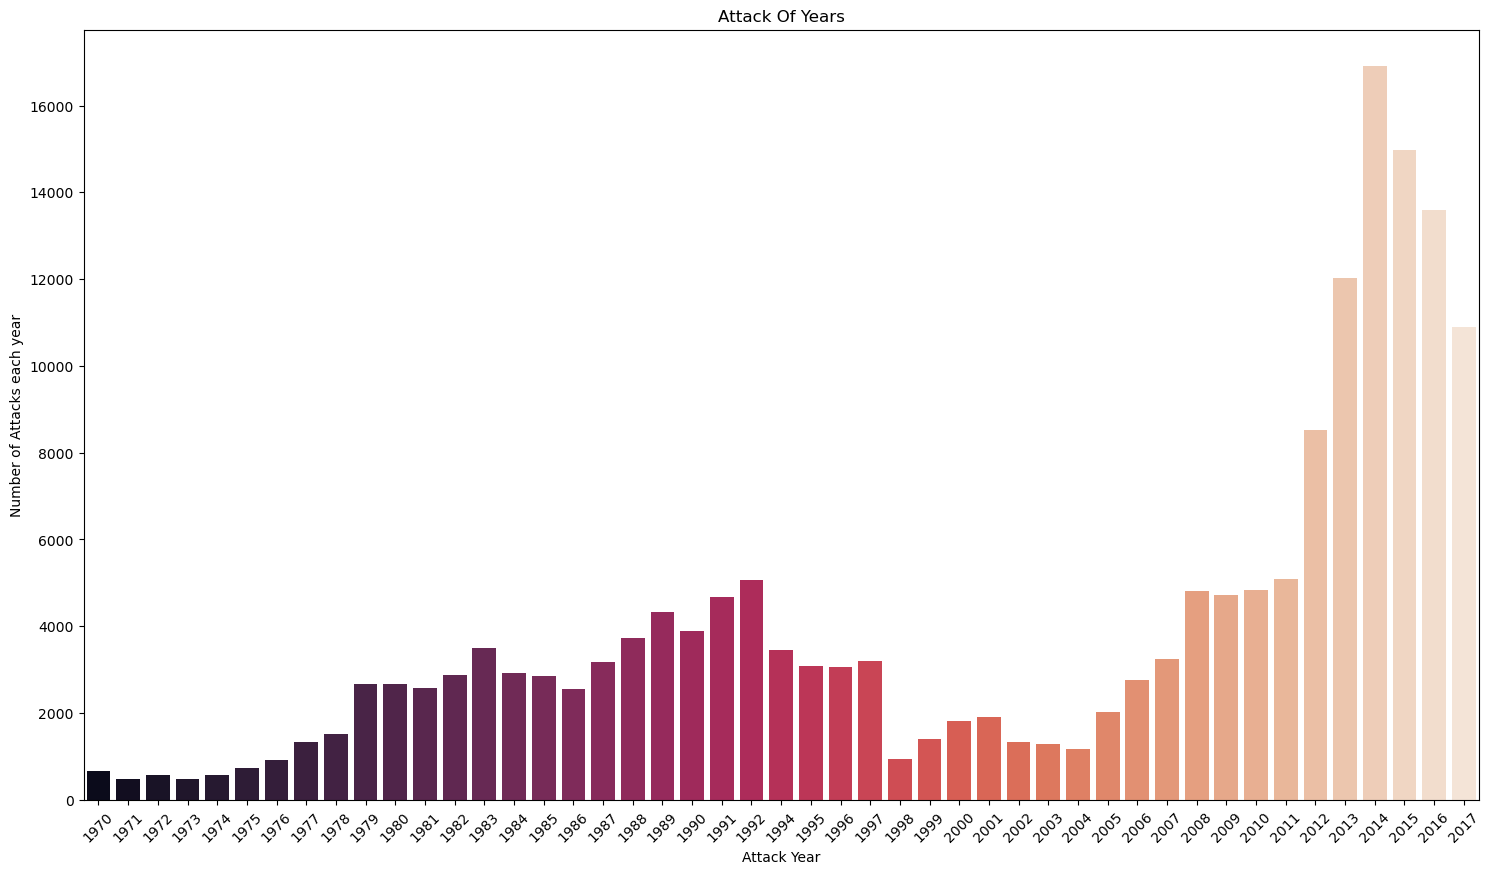

In [58]:
x_year = terrorism['Year'].unique()
y_count_years = terrorism['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'rocket')
plt.xticks(rotation = 45)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attack Of Years')
plt.show()

Text(0.5, 1.0, 'Number Of Terrorist Activities Each Year')

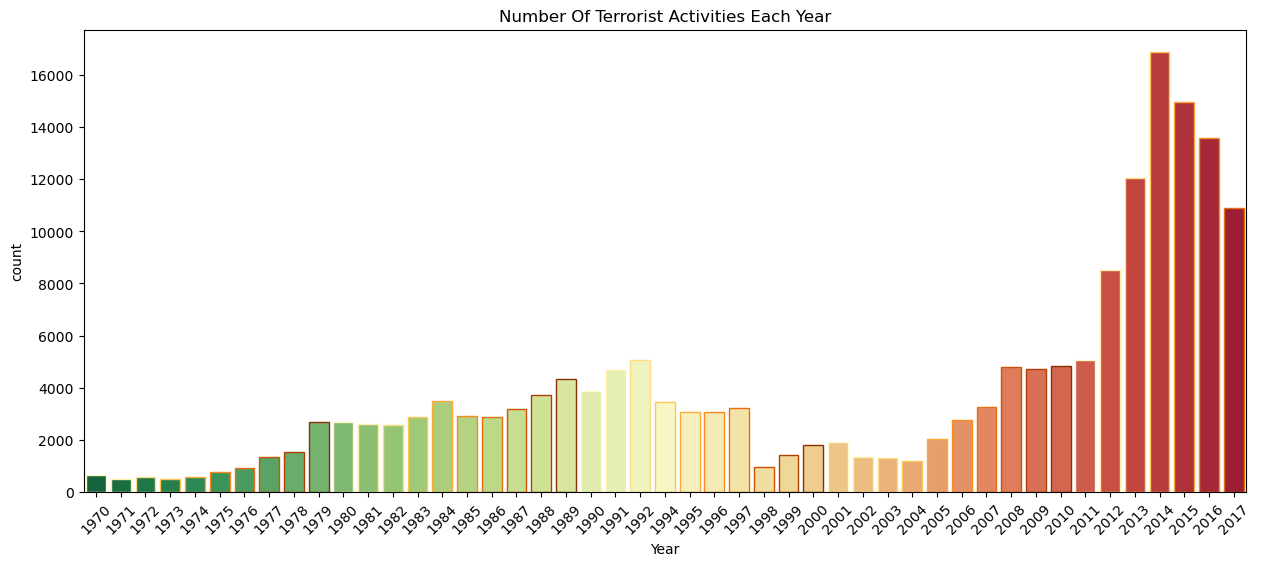

In [60]:
plt.subplots(figsize=(15, 6))
sns.countplot(x='Year', data=terrorism, palette='RdYlGn_r', edgecbbolor=sns.color_palette("YlOrBr", 10))
plt.xticks(rotation=45)
plt.title('Number Of Terrorist Activities Each Year')

### Terrorist Activities by Region in each Year through Area Plot

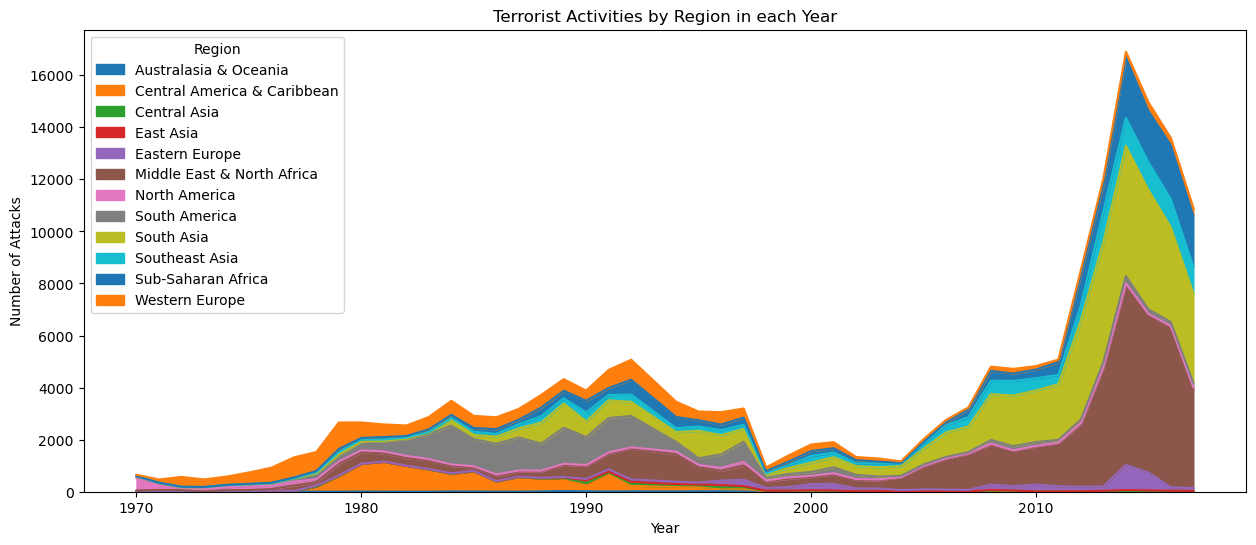

In [61]:
pd.crosstab(terrorism.Year, terrorism.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

In [62]:
terrorism['Wounded'] = terrorism['Wounded'].fillna(0).astype(int)
terrorism['Killed'] = terrorism['Killed'].fillna(0).astype(int)
terrorism['casualities'] = terrorism['Killed'] + terrorism['Wounded']

Values are sorted by the top 40 worst terror attacks as to keep the heatmap simple and easy to visualize



In [65]:
a1 = terrorism.sort_values(by='casualities',ascending=False)[:40]
heat=a1.pivot_table(index='Country',columns='Year',values='casualities')
heat.fillna(0,inplace=True)
heat.head()

Year,1982,1984,1992,1994,1995,1996,1997,1998,2001,2004,2005,2006,2007,2008,2009,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,536.0,0.0,584.0
Chad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1161.0,0.0,0.0,0.0,0.0,0.0
Ethiopia,0.0,0.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,520.0,0.0
India,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1005.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Top 10 Countries affected by Terror Attacks

In [66]:
terrorism.head(2)

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1,0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0,0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0


In [69]:
attk =terrorism['Country'].value_counts().head(10)
attk

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

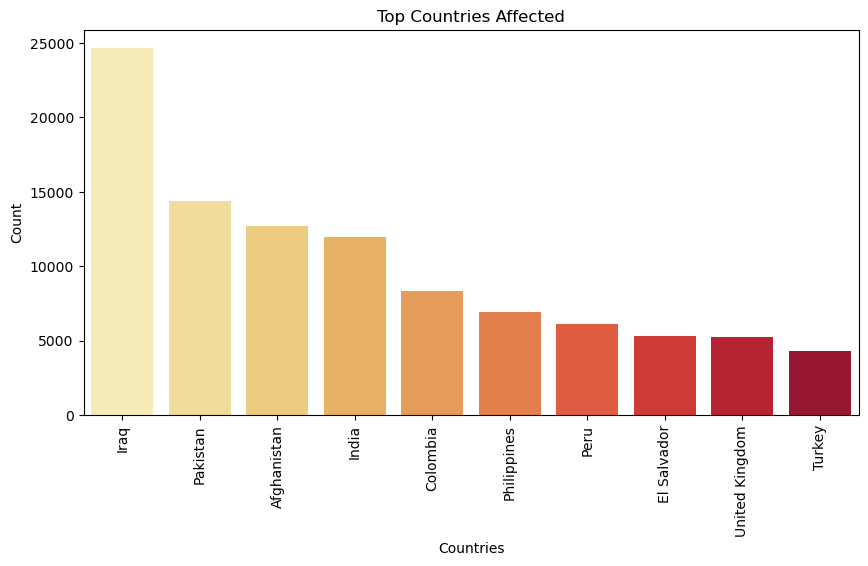

In [72]:
plt.figure(figsize=(10,5))
sns.barplot(x=attk.index, y=attk.values,palette='YlOrRd')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

### People Killed and Wounded In Each Region

In [73]:
aa=terrorism[["Region","Killed"]].groupby("Region").sum().sort_values(by="Killed",ascending=False)
aa

,Killed
Region,
Middle East & North Africa,137642
South Asia,101319
Sub-Saharan Africa,78386
South America,28849
Central America & Caribbean,28708
Southeast Asia,15637
Eastern Europe,7415
Western Europe,6694
North America,4916


In [74]:
ab=terrorism[["Region","Wounded"]].groupby("Region").sum().sort_values(by="Wounded",ascending=False)
ab

,Wounded
Region,
Middle East & North Africa,214308
South Asia,141360
Sub-Saharan Africa,52856
Southeast Asia,26259
North America,21531
Western Europe,18332
South America,16704
Eastern Europe,12045
East Asia,9213


<function matplotlib.pyplot.show(close=None, block=None)>

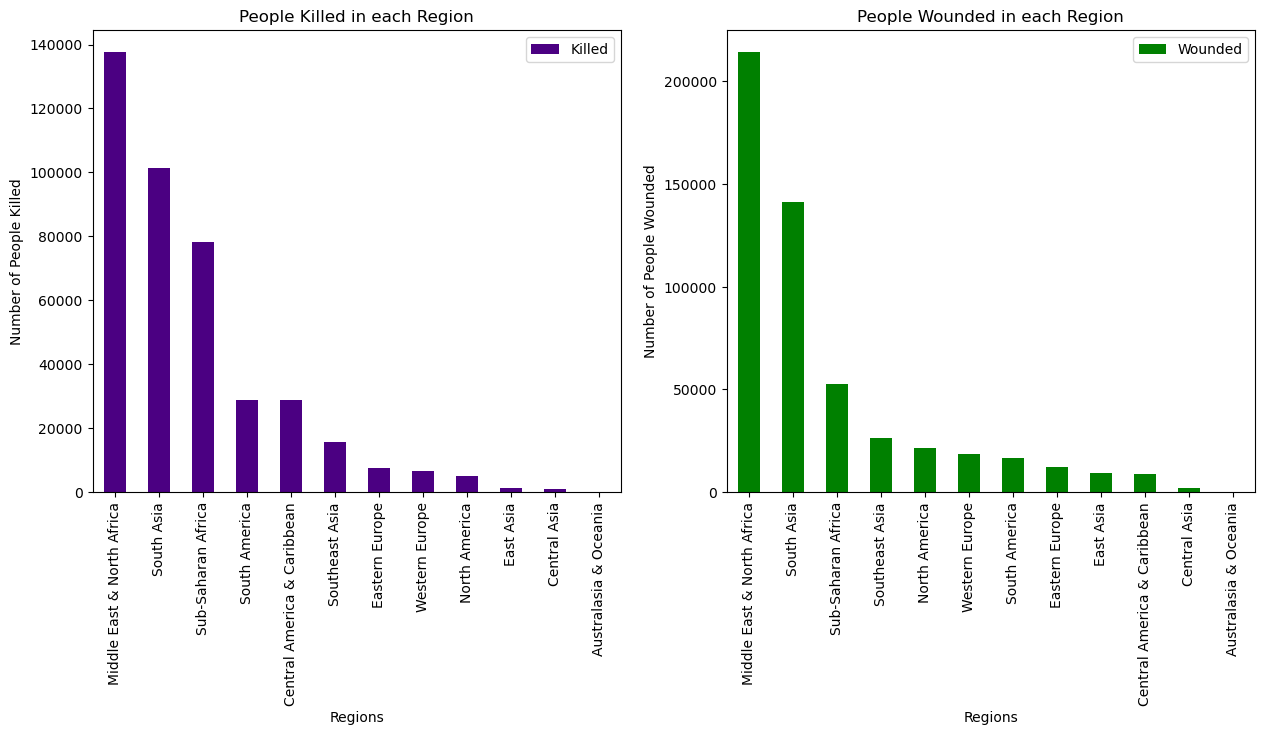

In [75]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#People Killed
aa.plot(kind="bar",color="indigo",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Region")
ax0.set_xlabel("Regions")
ax0.set_ylabel("Number of People Killed")

#People Wounded
ab.plot(kind="bar",color="green",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Region")
ax1.set_xlabel("Regions")
ax1.set_ylabel("Number of People Wounded")

plt.show